### 判斷要減掉幾個 sigma 小幫手
手動製作 region，  
會算出發射區內的 total flux 並畫成圖。  
找出斜率變化最大的地方就是減到真實信號的地方了...

0803 更新成一體式巢  
將 gasRegion 圈的更精細了

In [43]:
from casatasks import importfits, imstat
import matplotlib.pyplot as plt
import shutil

In [44]:
# 用了和 py_mom0_pipeline.ipynb 一樣的檔案系列

mole_info = [('CO-1-0', 'deeppink'),
             ('HCN-1-0', 'green'),
             ('HCO+-1-0', 'salmon'),
             ('CN-J12-12', 'royalblue'),
             ('CN-J32-12', 'slateblue'),
             ('HNC-1-0', 'darkcyan'),
             ('CS-J2-1', 'darkorange')
            ]
NsigmaL = [0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6]
thisFile = '/Users/aqing/Documents/1004/Circinus_galaxy/Ratio-Map/mvp_smoothFirst/3_mom0_multi-sigma/' # 太長了不好看，設個

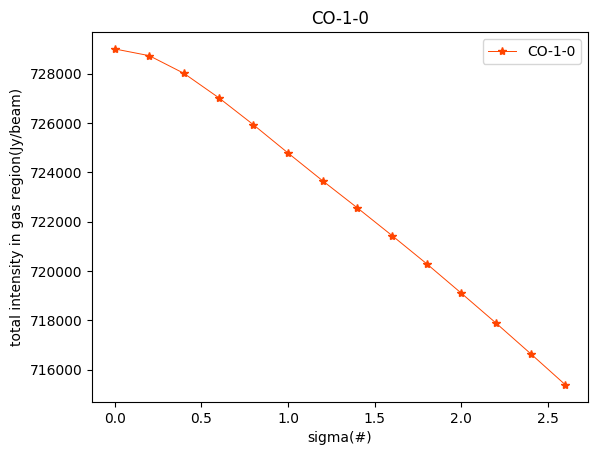

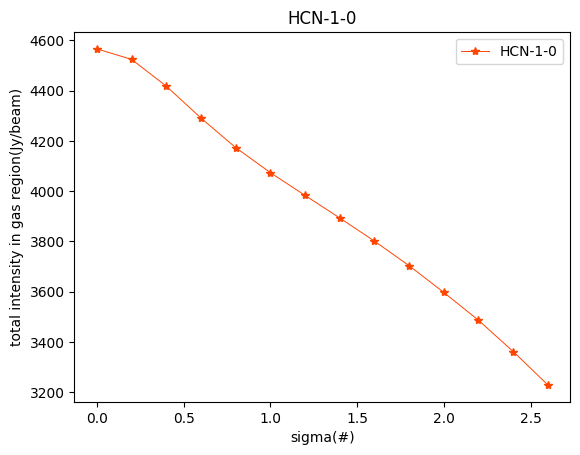

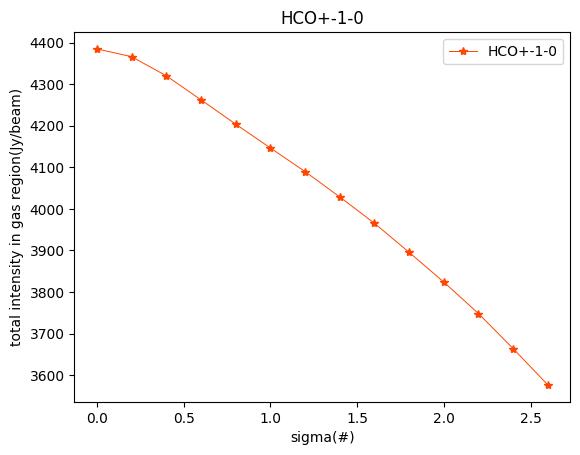

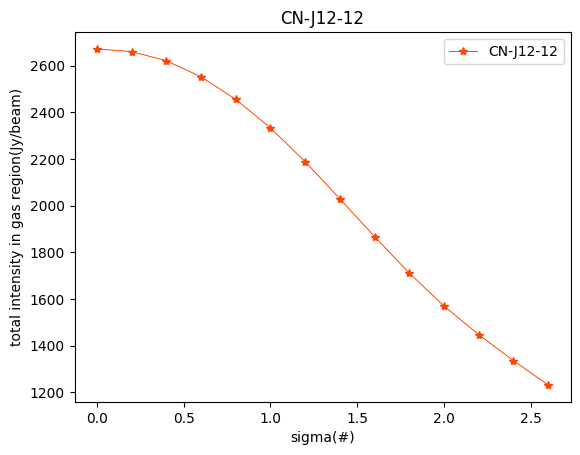

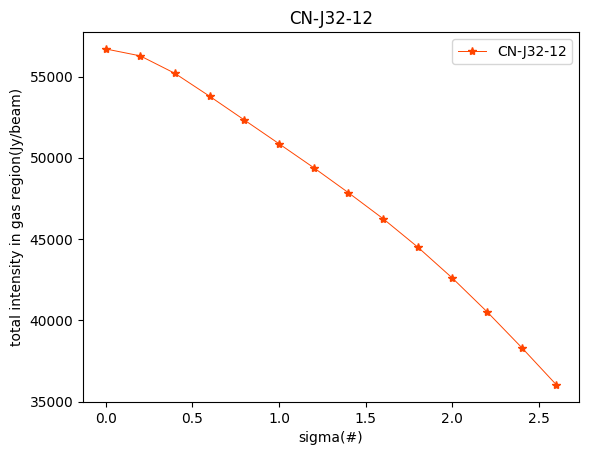

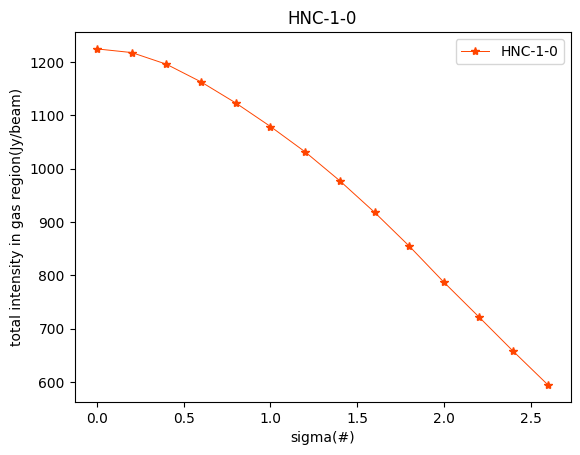

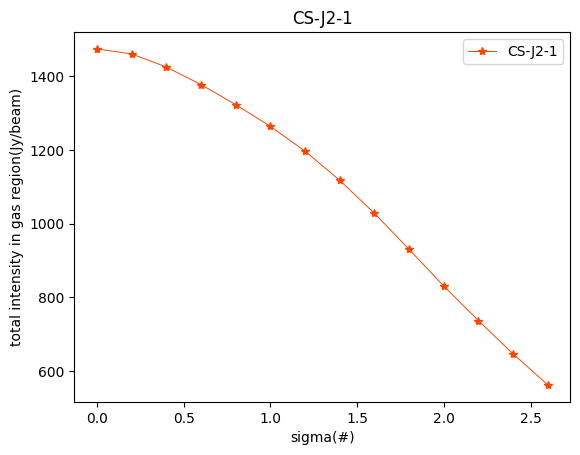

In [47]:
for m, c in mole_info:
    pixSum = [] # docs 說這和 flux(Jy) 好像不一樣
    for i in NsigmaL:
            pathIN = f'{thisFile}{m}_mom0_smoothed-4545_sigma{i}.fits'
            importfits(fitsimage=pathIN, imagename='casaIN.im', overwrite=True)
            staa = imstat('casaIN.im', region=f'{m}_gasRegion.crtf')
            pixSum.append(staa['sum'])
            shutil.rmtree('casaIN.im')
    plt.plot(NsigmaL, pixSum, marker='*', c='orangered', lw=0.7, label=m)
    plt.title(f'{m}')
    plt.xlabel('sigma(#)')
    plt.ylabel('total intensity in gas region(Jy/beam)')
    plt.legend()
    plt.show() # 懶得用子圖了啦啦啦